 # Religious Texts: NLP Series
 ## Sentiment Analysis of the Christianity religious text, Bible

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os
os.getcwd()

BIBLE = pd.read_csv('data/bible.csv', encoding = 'UTF-8')
BIBLE

,id,book_id,book_name,chapter,verse,world_english_bible_web,king_james_bible_kjv,leningrad_codex,jewish_publication_society_jps,codex_alexandrinus,brenton,samaritan_pentateuch,samaritan_pentateuch_english,onkelos_aramaic,onkelos_english
0,1,1,Genesis,1,1,"In the beginning God{After ""God,"" the Hebrew h...",In the beginning God created the heaven and th...,בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְ...,In the beginning God created the heaven and th...,ἐν ἀρχῇ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆν,In the beginning God made the heaven and the e...,בראשית ברא אלהים את השמים ואת הארץ,In the beginning God created the heaven and th...,בְּקַדְמִין בְּרָא יְיָ יָת שְׁמַיָּא וְיָת אַ...,In the first times the Lord created the heaven...
1,2,1,Genesis,1,2,Now the earth was formless and empty. Darknes...,"And the earth was without form, and void; and ...",וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל־...,"Now the earth was unformed and void, and darkn...",ἡ δὲ γῆ ἦν ἀόρατος καὶ ἀκατασκεύαστος καὶ σκότ...,"But the earth was unsightly and unfurnished, a...",והארץ היתה תהו ובהו וחשך על פני תהום ורוח אלהי...,"And the earth was without form, and void; and ...",וְאַרְעָא הֲוַת צָדְיָא וְרֵיקַנְיָא וַחֲשׁוֹכ...,"And the earth was waste and empty, and darknes..."
2,3,1,Genesis,1,3,"God said, ""Let there be light,"" and there was ...","And God said, Let there be light: and there wa...",וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי־אוֹר׃ ‬,"And God said: ""Let there be light."" And there ...",καὶ εἶπεν ὁ θεός γενηθήτω φῶς καὶ ἐγένετο φῶς,"And God said, Let there be light, and there wa...",ויאמר אלהים יהי אור ויהי אור,"And God said, Let there be light: and there wa...",וַאֲמַר יְיָ יְהֵי נְהוֹרָא וַהֲוָה נְהוֹרָא,"And the Lord said, Let there be light; and the..."
3,4,1,Genesis,1,4,"God saw the light, and saw that it was good. ...","And God saw the light, that it was good: and G...",וַיַּרְא אֱלֹהִים אֶת־הָאוֹר כִּי־טוֹב וַיַּבְ...,"And God saw the light, that it was good; and G...",καὶ εἶδεν ὁ θεὸς τὸ φῶς ὅτι καλόν καὶ διεχώρισ...,"And God saw the light that it was good, and Go...",וירא אלהים את האור כי טוב ויבדל אלהים בין האור...,"And God saw the light, that [it was] good: and...",וַחֲזָא יְיָ יָת נְהוֹרָא אֲרֵי טָב וְאַפְרֵשׁ...,And the Lord saw the light that it was good. A...
4,5,1,Genesis,1,5,"God called the light Day, and the darkness he ...","And God called the light Day, and the darkness...",וַיִּקְרָא אֱלֹהִים לָאוֹר יוֹם וְלַחֹשֶׁךְ קָ...,"And God called the light Day, and the darkness...",καὶ ἐκάλεσεν ὁ θεὸς τὸ φῶς ἡμέραν καὶ τὸ σκότο...,"And God called the light Day, and the darkness...",ויקרא אלהים לאור יום ולחשך קרא לילה ויהי ערב ו...,"And God called the light Day, and the darkness...",וּקְרָא יְיָ לִנְהוֹרָא יְמָמָא וְלַחֲשׁוֹכָא ...,"And the Lord called the light the Day, and the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31097,31098,66,Revelation,22,17,"The Spirit and the bride say, ""Come!"" He who ...","And the Spirit and the bride say, Come. And le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31098,31099,66,Revelation,22,18,I testify to everyone who hears the words of t...,For I testify unto every man that heareth the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31099,31100,66,Revelation,22,19,If anyone takes away from the words of the boo...,And if any man shall take away from the words ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31100,31101,66,Revelation,22,20,"He who testifies these things says, ""Yes, I co...","He which testifieth these things saith, Surely...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from tqdm import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
analyser = SentimentIntensityAnalyzer()

def predict_with_VaderSentiment(text):
    snt = analyser.polarity_scores(text)  #Calling the polarity analyzer
    if snt["compound"] >= 0:
        snt = "POSITIVE"
    else: snt="NEGATIVE"
    return snt


# Testing the operation of the model
text = "the most hated"
predict_with_VaderSentiment(text)

'NEGATIVE'

In [9]:
tqdm.pandas()
BIBLE['Sentiment Analysis'] = BIBLE['world_english_bible_web'].progress_apply(predict_with_VaderSentiment)
BIBLE

100%|██████████| 31102/31102 [00:05<00:00, 5757.67it/s]


,id,book_id,book_name,chapter,verse,world_english_bible_web,king_james_bible_kjv,leningrad_codex,jewish_publication_society_jps,codex_alexandrinus,brenton,samaritan_pentateuch,samaritan_pentateuch_english,onkelos_aramaic,onkelos_english,vaderSentiment-english.model,Sentiment Analysis
0,1,1,Genesis,1,1,"In the beginning God{After ""God,"" the Hebrew h...",In the beginning God created the heaven and th...,בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְ...,In the beginning God created the heaven and th...,ἐν ἀρχῇ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆν,In the beginning God made the heaven and the e...,בראשית ברא אלהים את השמים ואת הארץ,In the beginning God created the heaven and th...,בְּקַדְמִין בְּרָא יְיָ יָת שְׁמַיָּא וְיָת אַ...,In the first times the Lord created the heaven...,POSITIVE,POSITIVE
1,2,1,Genesis,1,2,Now the earth was formless and empty. Darknes...,"And the earth was without form, and void; and ...",וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל־...,"Now the earth was unformed and void, and darkn...",ἡ δὲ γῆ ἦν ἀόρατος καὶ ἀκατασκεύαστος καὶ σκότ...,"But the earth was unsightly and unfurnished, a...",והארץ היתה תהו ובהו וחשך על פני תהום ורוח אלהי...,"And the earth was without form, and void; and ...",וְאַרְעָא הֲוַת צָדְיָא וְרֵיקַנְיָא וַחֲשׁוֹכ...,"And the earth was waste and empty, and darknes...",NEGATIVE,NEGATIVE
2,3,1,Genesis,1,3,"God said, ""Let there be light,"" and there was ...","And God said, Let there be light: and there wa...",וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי־אוֹר׃ ‬,"And God said: ""Let there be light."" And there ...",καὶ εἶπεν ὁ θεός γενηθήτω φῶς καὶ ἐγένετο φῶς,"And God said, Let there be light, and there wa...",ויאמר אלהים יהי אור ויהי אור,"And God said, Let there be light: and there wa...",וַאֲמַר יְיָ יְהֵי נְהוֹרָא וַהֲוָה נְהוֹרָא,"And the Lord said, Let there be light; and the...",POSITIVE,POSITIVE
3,4,1,Genesis,1,4,"God saw the light, and saw that it was good. ...","And God saw the light, that it was good: and G...",וַיַּרְא אֱלֹהִים אֶת־הָאוֹר כִּי־טוֹב וַיַּבְ...,"And God saw the light, that it was good; and G...",καὶ εἶδεν ὁ θεὸς τὸ φῶς ὅτι καλόν καὶ διεχώρισ...,"And God saw the light that it was good, and Go...",וירא אלהים את האור כי טוב ויבדל אלהים בין האור...,"And God saw the light, that [it was] good: and...",וַחֲזָא יְיָ יָת נְהוֹרָא אֲרֵי טָב וְאַפְרֵשׁ...,And the Lord saw the light that it was good. A...,POSITIVE,POSITIVE
4,5,1,Genesis,1,5,"God called the light Day, and the darkness he ...","And God called the light Day, and the darkness...",וַיִּקְרָא אֱלֹהִים לָאוֹר יוֹם וְלַחֹשֶׁךְ קָ...,"And God called the light Day, and the darkness...",καὶ ἐκάλεσεν ὁ θεὸς τὸ φῶς ἡμέραν καὶ τὸ σκότο...,"And God called the light Day, and the darkness...",ויקרא אלהים לאור יום ולחשך קרא לילה ויהי ערב ו...,"And God called the light Day, and the darkness...",וּקְרָא יְיָ לִנְהוֹרָא יְמָמָא וְלַחֲשׁוֹכָא ...,"And the Lord called the light the Day, and the...",POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31097,31098,66,Revelation,22,17,"The Spirit and the bride say, ""Come!"" He who ...","And the Spirit and the bride say, Come. And le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE,POSITIVE
31098,31099,66,Revelation,22,18,I testify to everyone who hears the words of t...,For I testify unto every man that heareth the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE,POSITIVE
31099,31100,66,Revelation,22,19,If anyone takes away from the words of the boo...,And if any man shall take away from the words ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE,POSITIVE
31100,31101,66,Revelation,22,20,"He who testifies these things says, ""Yes, I co...","He which testifieth these things saith, Surely...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE,POSITIVE


In [10]:
counts = BIBLE['Sentiment Analysis'].value_counts()
counts

POSITIVE    22176
NEGATIVE     8926
Name: Sentiment Analysis, dtype: int64

In [12]:
df = BIBLE[['chapter', 'verse', 'world_english_bible_web', 'Sentiment Analysis']]
df.to_csv("result/bible+english_sentiment_analysis.csv", encoding="utf-8-sig", index=False)


### Negative sentiment

In [13]:
neg = df.loc[df['Sentiment Analysis'] == 'NEGATIVE']
neg

,chapter,verse,world_english_bible_web,Sentiment Analysis
1,1,2,Now the earth was formless and empty. Darknes...,NEGATIVE
35,2,5,"No plant of the field was yet in the earth, an...",NEGATIVE
50,2,20,"The man gave names to all livestock, and to th...",NEGATIVE
65,3,10,"The man said, ""I heard your voice in the garde...",NEGATIVE
68,3,13,"Yahweh God said to the woman, ""What is this yo...",NEGATIVE
...,...,...,...,...
31078,21,25,Its gates will in no way be shut by day (for t...,NEGATIVE
31080,21,27,There will in no way enter into it anything pr...,NEGATIVE
31083,22,3,There will be no curse any more. The throne o...,NEGATIVE
31085,22,5,"There will be no night, and they need no lamp ...",NEGATIVE


(-0.5, 1999.5, 999.5, -0.5)

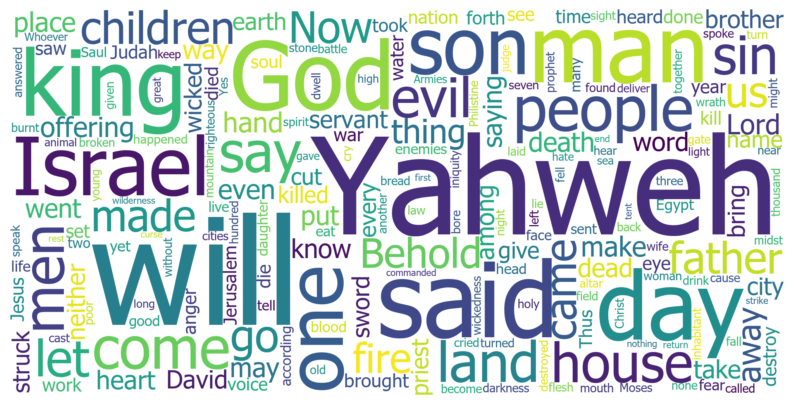

In [14]:
#Creating word cloud for the negative words (English)

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False,background_color="white", font_path='tahoma',width=2000,height=1000)
wc.generate(' '.join(neg['world_english_bible_web']))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

### Positive sentiment

In [15]:
pos = df.loc[df['Sentiment Analysis'] == 'POSITIVE']
pos

,chapter,verse,world_english_bible_web,Sentiment Analysis
0,1,1,"In the beginning God{After ""God,"" the Hebrew h...",POSITIVE
2,1,3,"God said, ""Let there be light,"" and there was ...",POSITIVE
3,1,4,"God saw the light, and saw that it was good. ...",POSITIVE
4,1,5,"God called the light Day, and the darkness he ...",POSITIVE
5,1,6,"God said, ""Let there be an expanse in the midd...",POSITIVE
...,...,...,...,...
31097,22,17,"The Spirit and the bride say, ""Come!"" He who ...",POSITIVE
31098,22,18,I testify to everyone who hears the words of t...,POSITIVE
31099,22,19,If anyone takes away from the words of the boo...,POSITIVE
31100,22,20,"He who testifies these things says, ""Yes, I co...",POSITIVE


(-0.5, 1999.5, 999.5, -0.5)

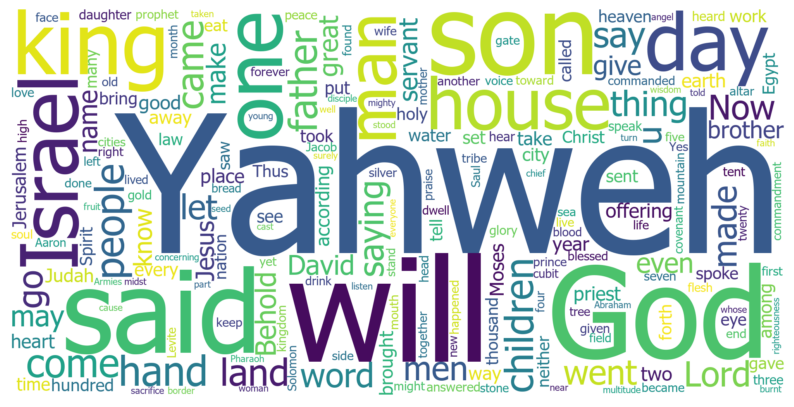

In [16]:
#Creating word cloud for the negative words (English)

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False,background_color="white", font_path='tahoma',width=2000,height=1000)
wc.generate(' '.join(pos['world_english_bible_web']))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")